## Seaborn questions

### Question 1 
The "flights" dataset is available via Seaborn (it can be accessed the same way as the tips data in the examples), and consists of three columns: year, month, and passengers.
Create a 2-by-2 grid of plots where each plot represents a quarter of the year, e.g. quarter 1 contains January, February, March. For each quarter, plot how the number of passengers per month changes over the years. Use a custom colour palette to assign different colours to each month.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
flight_data = sns.load_dataset("flights")
print(flight_data.head)

<bound method NDFrame.head of      year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
..    ...        ...         ...
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]>


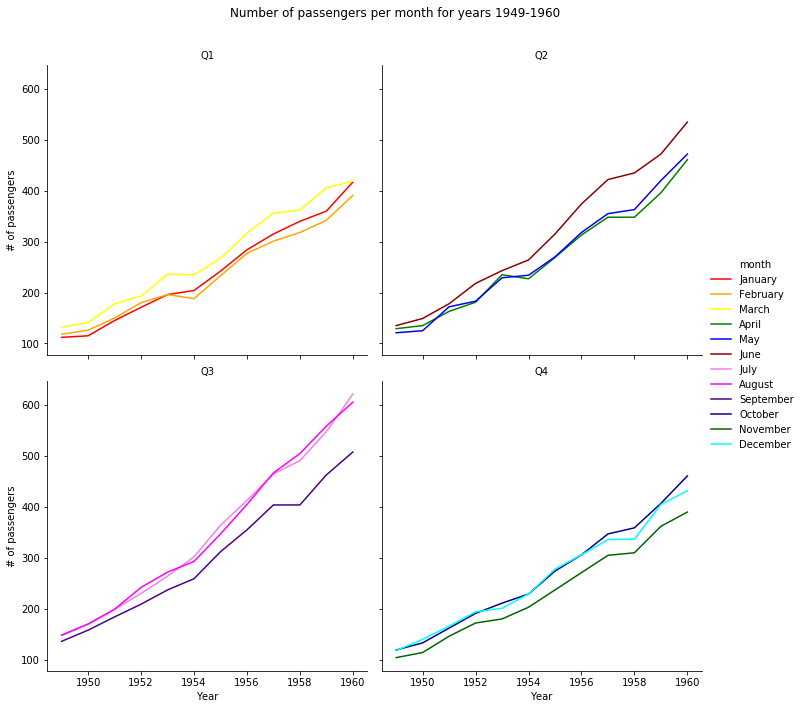

In [3]:
quarter_dict={
    "January": "Q1",
    "February": "Q1",
    "March": "Q1",
    "April": "Q2",
    "May": "Q2",
    "June": "Q2",
    "July": "Q3",
    "August": "Q3",
    "September": "Q3",
    "October": "Q4",
    "November": "Q4",
    "December": "Q4",
}

palette_dict={
    "January": "red",
    "February": "orange",
    "March": "yellow",
    "April": "green",
    "May": "blue",
    "June": "darkred",
    "July": "violet",
    "August": "magenta",
    "September": "indigo",
    "October": "darkblue",
    "November": "darkgreen",
    "December": "cyan",
}

#Creating a numpy array using a list comprehenstion and the quarter_dict
quarter_array = np.array([quarter_dict[l] for l in flight_data["month"]])
#Adding array as column to flight_data
flight_data["quarter"] = quarter_array

#Main plotting function, make sure you understand what each argument is doing
g = sns.relplot(x="year", y="passengers", hue="month", col="quarter", palette=palette_dict, col_wrap=2, kind="line", data=flight_data)

#Functions to tidy up the plot titles and axis labels
g.set_titles("{col_name}")
g.set_axis_labels("Year", "# of passengers")
g.fig.suptitle("Number of passengers per month for years 1949-1960")
plt.subplots_adjust(top=0.9)

### Question 2
One of your researcher friends has asked you to help them make a figure for a poster they will be presenting. Their supervisor is colorblind, and hates plots without gridlines. Their data is available using `sns.load_dataset("mpg")`, and they want two subplots in their figure:
1. The first subplot should show the difference in the distribution of MPG in cars manufactured in USA, Japan, and Europe.
2. The second subplot should show the relationship between horsepower and MPG for the same regions as above.
Try and make the figure most suitable for your friend.

In [4]:
mpg_data = sns.load_dataset("mpg")
mpg_data.head

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  

[Text(0, 0.5, 'Horsepower'), Text(0.5, 0, 'Miles per gallon (MPG)')]

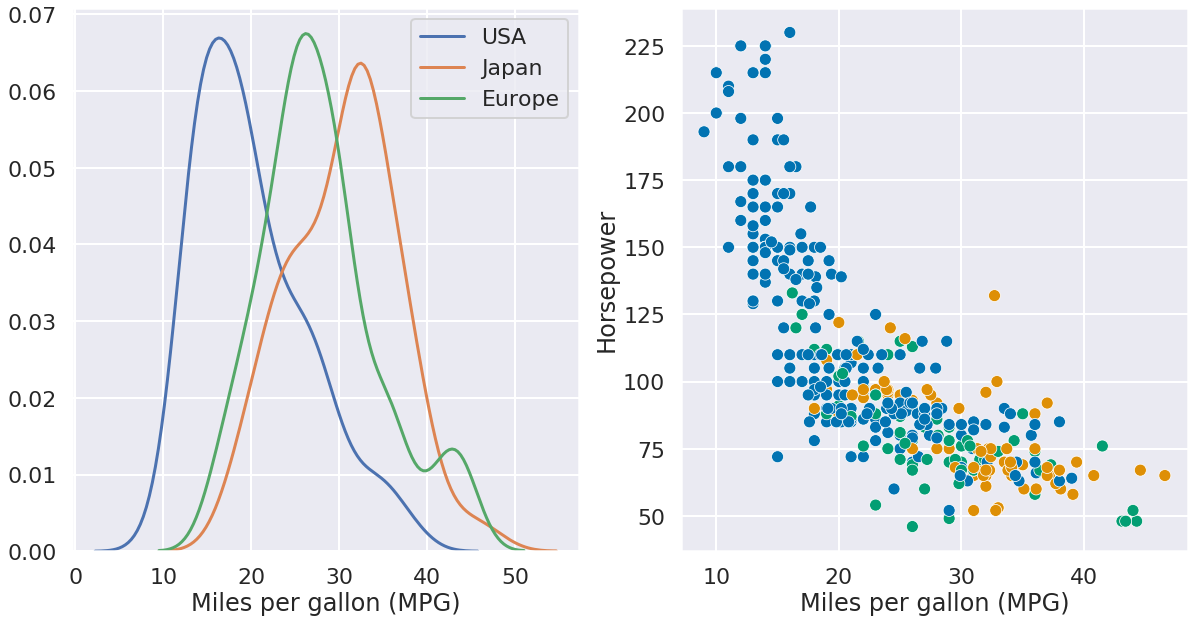

In [5]:
sns.set(context="poster", style="darkgrid")
eu_mpg = mpg_data[mpg_data["origin"]=="europe"]
usa_mpg = mpg_data[mpg_data["origin"]=="usa"]
japan_mpg = mpg_data[mpg_data["origin"]=="japan"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [20,10])

#Creating each distribution separately on the same axes object
sns.distplot(usa_mpg["mpg"], ax=ax1, label="USA", hist=False)
sns.distplot(japan_mpg["mpg"], ax=ax1, label="Japan", hist=False)
sns.distplot(eu_mpg["mpg"], ax=ax1, label="Europe", hist=False)
ax1.set(xlabel="Miles per gallon (MPG)")
ax1.legend()
#Creating the scatterplot on the second axes object
sns.scatterplot(x="mpg", y="horsepower", hue="origin", palette="colorblind", ax=ax2, data=mpg_data, legend=False)
ax2.set(xlabel="Miles per gallon (MPG)", ylabel="Horsepower")